## Spam Classification :

- Data has been sourced from UCI Machine learning repo.
- Basic preprocessing has been performed using re module and string methods.
- For the final model Tfidf Vectorizer has been used because of better results.
- For the model, Random Forest with class weights has been used.
- Metric priority for this problem was precision(False Positives are not toleerated in this use case) and we have achieved 100% in our final model.

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve
import seaborn as sns

In [2]:
df = pd.read_csv('.\smsspamcollection\SMSSpamCollection', sep='\t', header=None, names=['target','message'])
df

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
corpus= []
stop_words = stopwords.words('english')
for i in range(len(df)):
    sentence= df.iloc[i,1]
    sentence= re.sub(r'[^a-z]', ' ', sentence).split()
    sentence= [str.lower(word) for word in sentence if word not in stop_words]
    sentence= [PorterStemmer().stem(word) for word in sentence]
    sentence= ' '.join(sentence)
    corpus.append(sentence)

In [4]:
corpus

['jurong point crazi vailabl bugi n great world la e buffet ine got amor wat',
 'k lar oke wif u oni',
 'ree entri wkli comp win final tkt st ay ext receiv entri question std txt rate appli',
 'dun say earli hor c alreadi say',
 'ah think goe usf live around though',
 'ree sg ey darl week word back like fun still b ok x std chg send rcv',
 'ven brother like speak hey treat like aid patent',
 'per request ell ell ru innaminungint urungu ettam set callertun aller ress copi friend allertun',
 'valu network custom select receivea prize reward claim call laim code alid hour',
 'ad mobil month entitl pdate latest colour mobil camera ree obil pdate',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'chanc win rom pound txt send ost p day day sand appli epli info',
 'ou week membership rize ackpot xt word www dbuk net',
 'search right word thank breather promis wont take help grant fulfil promis ou wonder bless time',
 '',
 'obil ovi lub use credit click link next txt mes

In [5]:
bow= pd.DataFrame(CountVectorizer(max_features=5000).fit_transform(corpus).toarray())

In [6]:
tfidf=pd.DataFrame(TfidfVectorizer(max_features=5000).fit_transform(corpus).toarray())

In [7]:
bow['target'] = df['target']
tfidf['target'] = df['target']

In [8]:
bow

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,spam
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,spam
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham


In [9]:
tfidf

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spam
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spam
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = bow.drop('target', axis=1)
y = bow['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))

0.9990428332136875


In [11]:
print(rf.score(X_test, y_test))

0.9763101220387652


In [12]:
X = tfidf.drop('target', axis=1)
y = tfidf['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
rf = RandomForestClassifier(class_weight={'ham':1, 'spam':10}, random_state=42)
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

0.9995214166068438
0.9806173725771715


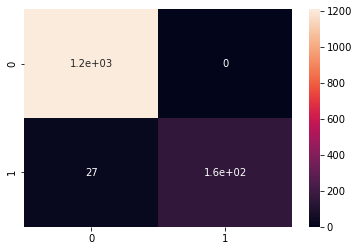

In [13]:

y_pred = rf.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True);

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1207
        spam       1.00      0.85      0.92       186

    accuracy                           0.98      1393
   macro avg       0.99      0.93      0.96      1393
weighted avg       0.98      0.98      0.98      1393



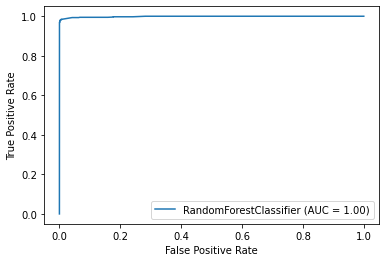

In [15]:
plot_roc_curve(rf, X, y);